# Universidad Central


##  Curso Transformación Digital a través de la Inteligencia Artificial

# Imágen

In [1]:
# Cargar y mostrar imagen
# from google.colab import drive
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg  # ¡Esta línea faltaba!
# drive.mount('/content/drive')
# img_path = '/content/drive/MyDrive/Curso IA/uc.jpg'
# img= mpimg.imread(img_path)
# # img = mpimg.imread(img_path)
# plt.imshow(img)
# plt.axis('off')  # Oculta los ejes
# plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



###      Importar librerías



In [ ]:
#Importación de librerías
import pandas as pd  #Manipulación y análisis de datos estructurados (similar a Excel en Python).
import matplotlib.pyplot as plt # Gráficos de barras, dispersión,...
import seaborn as sns # Visualización estadística
import matplotlib.ticker as ticker
from google.colab import drive #: Integración con Google Drive

Este conjunto de datos contiene precios de viviendas en Nueva York y proporciona información valiosa sobre el mercado inmobiliario de la región. Incluye información como títulos de propiedad, tipos de vivienda, precios, número de dormitorios y baños, superficie de la propiedad, direcciones, estado, áreas administrativas y locales, nombres de calles y coordenadas geográficas.

**https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market**

#  Paleta de colores de latex
**https://latexcolor.com/**


###  Lectura de los datos

In [ ]:
# Acceder a google Drive desde Colab

drive.mount('/content/drive')

# Cargar el conjunto de datos
archivo = "/content/drive/MyDrive/NY-House-Dataset.csv"  # Cambiar esta ruta si el archivo está en otro directorio
df = pd.read_csv(archivo)

In [ ]:
df.info()

##  Conjunto de datos

Este conjunto de datos contiene precios de viviendas en Nueva York y proporciona información valiosa sobre el mercado inmobiliario de la región. Incluye información como títulos de propiedad, tipos de vivienda, precios, número de dormitorios y baños, superficie de la propiedad, direcciones, estado, áreas administrativas y locales, nombres de calles y coordenadas geográficas.

**https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market**

-----------------------------------------------------

##  Variables

+ **BROKERTITLE**:  Cargo del corredor

+ **TYPE**: Tipo de casa

+ **PRICE**: Precio de la casa

+ **BEDS**:  Número de dormitorios

+ **BATH**: : Número de baños

+ **PROPERTYSQFT**: Superficie de la propiedad

+ **ADDRESS**: Dirección  de la casa

+ **STATE**: Estado de la casa

+ **MAIN_ADDRESS**: Información de la dirección principal

+ **ADMINISTRATIVE_AREA_LEVEL_2**: Información del área administrativa nivel 2

+ **LOCALITY**: Información de la localidad

+ **SUBLOCALITY**: Información de la sublocalidad

+ **STREET_NAME**: Nombre de la calle

+ **LONG_NAME**: Nombre largo

+ **FORMATTED_ADDRESS**: Dirección formateada

+ **LATITUDE**: Coordenada de latitud de la casa

+ **LONGITUDE**: Coordenada de longitud de la casa


------------------------------



In [ ]:
#Ver los 5 primeros registros del conjunto de datos
df.head(5)

#  Identificación de la Tipología de Variables y Valores Faltantes

In [ ]:

data_types = df.dtypes
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

summary = pd.DataFrame({
    "Data Type": data_types,
    "Missing Values": missing_values
}).sort_values(by="Missing Values", ascending=False)

print("Duplicated Rows:", duplicates)
print(summary)



# **Análisis descriptivo**


+  Informe general de los datos



In [ ]:
print("\nInformación del dataset:")
print(df.info())
df.shape

## Estadísticas descriptivas

In [ ]:
print("\nEstadísticas descriptivas:")
print(round(df.describe()),5)

+ media del área

$$\bar{x} = \dfrac{\sum_{i=1}^{n} x_i}{n} = 2184$$


#  Medidas de Tendencia Central, asimetría y curtosis

In [ ]:

numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
statistics = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']).transpose()
statistics.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
}, inplace=True)

print("\nMedidas de tendencia central y dispersión:\n", statistics)



+ Medidas de tendencia central: media, mediana

+ Medida de dispersión: varianza, desviación estandar

$$
s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}
$$

$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}
$$

#  Análisis Gráfico Univariado y Bivariado

In [ ]:
# Análisis de precios
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True, color="#99BADD")
plt.title('Distribución de Precios de Propiedades')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.xscale('log')  # Usar escala logarítmica por la amplia dispersión de precios
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Convertir a millones y crear el histograma
sns.histplot(df['PRICE']/100000, bins=50, kde=True, color='tomato')

# Configurar el formato de los millones en el eje X
def millones_formatter(x, pos):
    return f'${x:.1f}M'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millones_formatter))

# Personalización avanzada
plt.title('Distribución de Precios de Propiedades (en millones de USD)',
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Precio (Millones de USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Ajustar los límites si hay valores extremos
plt.xlim(left=0)  # Comenzar desde 0

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Top 5 de propiedades más caras

In [ ]:
# Top 5 propiedades más caras
top_5_expensive = df.nlargest(5, 'PRICE')[['ADDRESS', 'PRICE', 'TYPE', 'BEDS', 'BATH']]
print("\nTop 5 propiedades más caras:")
print(top_5_expensive)

# Análisis por tipo de propiedad

In [ ]:
# Análisis por tipo de propiedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='TYPE', order=df['TYPE'].value_counts().index,color='#00FFFF')
plt.title('Distribución por Tipo de Propiedad')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Propiedad')
plt.show()

# Precio promedio por tipo de propiedad

In [ ]:
# Precio promedio por tipo de propiedad
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='TYPE', y='PRICE', estimator='mean',color="#66FF00")
plt.title('Precio Promedio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45)
plt.show()

# Relación entre tamaño y precio

In [ ]:
# Relación entre tamaño y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PROPERTYSQFT', y='PRICE', hue='TYPE')
plt.title('Relación entre Tamaño y Precio')
plt.xlabel('Tamaño (sqft)')
plt.ylabel('Precio (USD)')
plt.yscale('log')
plt.show()

In [ ]:
# Distribución de habitaciones y baños
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='BEDS', ax=axes[0], color="#BD33A4")
axes[0].set_title('Distribución de Habitaciones')
sns.countplot(data=df, x='BATH', ax=axes[1], color="#FF0038")
axes[1].set_title('Distribución de Baños')
plt.show()

In [ ]:

sns.set(style="whitegrid")

# Distribuciones de variables numéricas
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()



In [ ]:
# Relación con el precio
for col in numerical_columns:
    if col != 'PRICE':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y='PRICE')
        plt.title(f'Relación entre {col} y Precio', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Precio')
        plt.show()

#   Análisis de Correlación


El coeficiente de correlación (Pearson) mide la relación lineal entre dos variables

+   $-1 \leq r_{x,y}  \leq 1$

+   $r_{x,x}=1$

+   $r_{x,y}=r_{y,x}$

+   a-dimensional

+  Se interpreta el signo:

   + positivo: indica relación directa

   + negativo: indica relación inversa


+  Se interpreta la fuerza de la relación:

   + Cerca del cero: debil

   + Cerca a 1 o a -1 : fuerte   

In [ ]:

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.show()



#  Tratamiento de Valores Atípicos

In [ ]:

#valores atípicos
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Inicializar df_cleaned con una copia de df antes de usarlo
df_cleaned = df.copy()  # Crear una copia para no modificar el DataFrame original

df_cleaned = remove_outliers(df_cleaned, 'PRICE')
df_cleaned = remove_outliers(df_cleaned, 'PROPERTYSQFT')
df_cleaned = remove_outliers(df_cleaned, 'BEDS')
df_cleaned = remove_outliers(df_cleaned, 'BATH')




# Visualización antes y después para PRICE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['PRICE'])
plt.title('Precio - Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['PRICE'])
plt.title('Precio - Después de remover atípicos')
plt.show()

df_clean = df.drop_duplicates()
df_clean = df_clean[(df_clean['PRICE'] < 1e8) & (df_clean['BATH'] <= 10)]

In [ ]:


# Visualización antes y después para PROPERTYSQFT
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['PROPERTYSQFT'])
plt.title('Tamaño de propiedad - Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['PROPERTYSQFT'])
plt.title('Tamaño de propiedad - Después de remover atípicos')
plt.show()



In [ ]:
# Visualización antes y después para BEDS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BEDS'], color="violet")
plt.title('Número de dormitorios- Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['BEDS'], color="orange")
plt.title('Número de dormitorios- Después de remover atípicos')
plt.show()

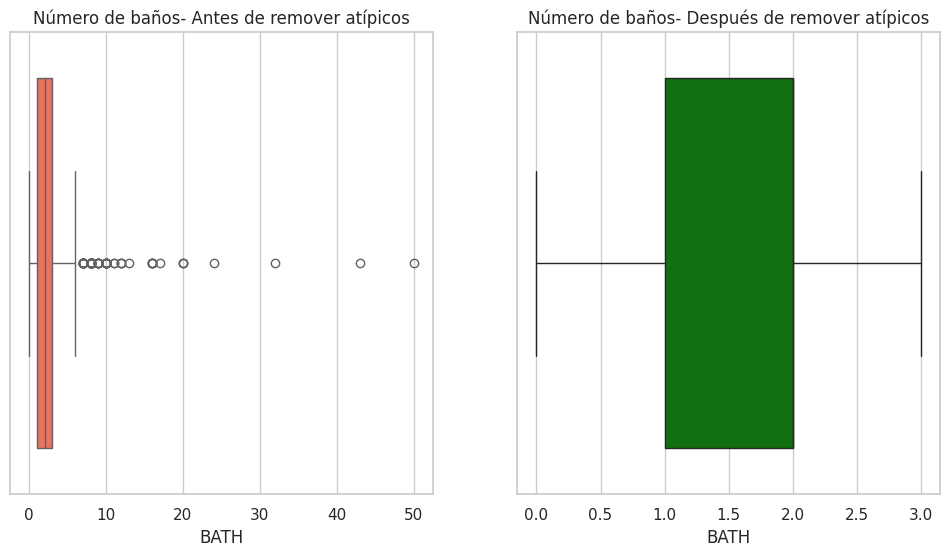

In [ ]:
# Visualización antes y después para BEDS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['BATH'], color="tomato")
plt.title('Número de baños- Antes de remover atípicos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['BATH'], color="green")
plt.title('Número de baños- Después de remover atípicos')
plt.show()

# Codificación de Variables Categóricas

Colocarle números a un variable cualitativa

ej Bueno, regulra y malo
1ro crear vriables Dummy
2do quitar una
ej =
{1 bueno O no


In [ ]:

categorical_columns = ['TYPE', 'STATE', 'SUBLOCALITY']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Mostrar las primeras filas codificadas
print(df_encoded.head(4))



                                     BROKERTITLE   PRICE  BEDS  BATH  \
0    Brokered by Douglas Elliman  -111 Fifth Ave  315000     2   2.0   
2                         Brokered by Sowae Corp  260000     4   2.0   
3                            Brokered by COMPASS   69000     3   1.0   
6  Brokered by Douglas Elliman - 575 Madison Ave  899500     2   2.0   

   PROPERTYSQFT                  ADDRESS  \
0   1400.000000     2 E 55th St Unit 803   
2   2015.000000         620 Sinclair Ave   
3    445.000000  2 E 55th St Unit 908W33   
6   2184.207862   157 W 126th St Unit 1B   

                                 MAIN_ADDRESS ADMINISTRATIVE_AREA_LEVEL_2  \
0      2 E 55th St Unit 803New York, NY 10022             New York County   
2     620 Sinclair AveStaten Island, NY 10312               United States   
3  2 E 55th St Unit 908W33Manhattan, NY 10022               United States   
6    157 W 126th St Unit 1BNew York, NY 10027                    New York   

          LOCALITY       STREET_

#  Ingeniería de Características

In [ ]:
#  7. Ingeniería de Características
df_encoded['PRICE_PER_SQFT'] = df_encoded['PRICE'] / df_encoded['PROPERTYSQFT']
df_encoded['BATHS_PER_BED'] = df_encoded['BATH'] / df_encoded['BEDS']
df_encoded['BEDS_PER_SQFT'] = df_encoded['BEDS'] / df_encoded['PROPERTYSQFT']

# Visualización de las nuevas variables
print(df_encoded[['PRICE', 'PROPERTYSQFT', 'PRICE_PER_SQFT', 'BATHS_PER_BED', 'BEDS_PER_SQFT']].head())

    PRICE  PROPERTYSQFT  PRICE_PER_SQFT  BATHS_PER_BED  BEDS_PER_SQFT
0  315000   1400.000000      225.000000       1.000000       0.001429
2  260000   2015.000000      129.032258       0.500000       0.001985
3   69000    445.000000      155.056180       0.333333       0.006742
6  899500   2184.207862      411.819779       1.000000       0.000916
8  265000    750.000000      353.333333       1.000000       0.001333


# Modelos de regresión

+  **Regresión:**

$$y=f(x_1, x_2, \dots ,x_p)+ \varepsilon$$

+ donde $(x_1, \dots, x_p)$ son variables

+   $y:$  variable **respuesta** (dependiente)


+   $x_1.x_2,  \dots, x_p:$ variables independientes

Se debe escojer las variables, cuales son las x y cuales son las y

ej variable $y$ precio del predio en relacion de todas las otras variables, ej $x:$ área


###  Modelo de regresión lineal


$$y=\beta_0+\beta_1x_1+  \cdots + \beta_px_p+ \varepsilon$$

### Modelo estimado

Se debe entrenar el modelo para que de valores estimados a variables

$$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+  \cdots + \hat{\beta}_px_p$$


## Importación de librerías

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Función para entrenar, evaluar, graficar modelos y cálculo de métricas


En **Machine Learning**, entrenar un modelo de regresión con datos es fundamental porque permite que el algoritmo aprenda la relación entre las variables predictoras (características o features) y la variable objetivo (target).

>  0.  Tomar el 20% para entrenar y 80 de prueba (20 - 80) y si la cantidad total de datos es pequeña se debe tomar mas muestra para entrenar ej (40 - 60). Los datos de entrenamiento se toman de roma aleatorea

>  1. Aprender la Relación entre Variables
El objetivo de un modelo de regresión (como Regresión Lineal, Regresión Polinómica, etc.) es predecir un valor continuo (como precios, temperaturas, ventas, etc.).
Durante el entrenamiento, el algoritmo ajusta los parámetros del modelo (como coeficientes en regresión lineal) para minimizar el error entre las predicciones y los valores reales.



> 2. Generalizar a Datos No Vistos
El modelo debe ser capaz de hacer buenas predicciones en datos que no ha visto antes (datos de prueba o nuevos datos).
Si no se entrena correctamente, el modelo puede sufrir de sobreajuste (**overfitting**) o subajuste (**underfitting**).

> 3. Optimizar la Función de Pérdida (Loss Function)
En regresión, se usa comúnmente el Error Cuadrático Medio (MSE) como función de pérdida.
El entrenamiento busca minimizar esta función, ajustando los pesos del modelo mediante métodos como Gradiente Descendente.

> 4. Evaluar el Rendimiento del Modelo
Al entrenar con datos históricos, podemos medir métricas como:

+ $R^2$ (Coeficiente de Determinación) → Qué tan bien explica el modelo la variabilidad de los datos.

+ MAE (Error Absoluto Medio) → Magnitud promedio de los errores.

+ RMSE (Raíz del Error Cuadrático Medio) → Error en las mismas unidades que la variable objetivo.

>  5. Prevenir Sesgos y Mejorar la Precisión
Un buen entrenamiento asegura que el modelo no esté sesgado hacia ciertos patrones irrelevantes.
Técnicas como validación cruzada (cross-validation) ayudan a garantizar que el modelo generalice bien.

In [ ]:
# Función para entrenar, evaluar y graficar modelos
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    """
    Entrena un modelo de regresión, evalúa su rendimiento y grafica predicciones vs. valores reales.

    Parámetros:
        model: Modelo de sklearn a entrenar.
        X_train, X_test: características de entrenamiento y prueba.
        y_train, y_test: Objetivo de entrenamiento y prueba.
        title: Título para el gráfico.

    Retorna:
        Diccionario con métricas de evaluación.
    """
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Cálculo de métricas
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

      # Gráfico de predicciones vs valores reales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, edgecolor='k', label='Datos')
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             '--r',
             linewidth=2,
             label='Línea ideal')
    plt.xlabel("Precio Real", fontsize=12)
    plt.ylabel("Precio Predicho", fontsize=12)
    plt.title(f"{title} - Predicción vs Real", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    return metrics

#  Preparación de los Datos

In [ ]:


# Variables objetivo y predictoras para la base original
X_original = df[['BEDS', 'BATH', 'PROPERTYSQFT']]
y_original = df['PRICE']

# Variables para la base tratada (sin atípicos, codificada y con nuevas características)
X_processed = df_encoded.drop(columns=['PRICE', 'ADDRESS', 'MAIN_ADDRESS', 'BROKERTITLE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME'], errors='ignore')
y_processed = df_encoded['PRICE']

# División train-test
# esta entreanado el 20% --> test_size=0.2, random_state=44 --> numero aleatorio para sacar muestra de 20% aleatorio
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=742025)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(X_processed, y_processed, test_size=0.2, random_state=742025)

#  Modelos y Evaluación

+  Regresión tradicional (Mínimos Cuadrados Ordinarios)

+  Regresión Lasso (Regularización $L_1$)

+  Regresión Ridge (Regularización $L_2$)

-----------------------------------------------



###  Regresión tradicional

+  Mínimos Cuadrados Ordinarios - OLS

Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2$$

#### Propiedades :

+  No considera multicolinealidad

+  Solución analítica cerrada:

$$\hat{\pmb{\beta}}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}$$

+  Alta varianza cuando $p \approx n$


---------------------------------------------


###  Regresión Lasso

+  Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2 +\lambda(|\beta_1|+ |\beta_2|+  \cdots +|\beta_p|)$$

#### Propiedades :

+  Penalización absoluta ($L1$) sobre los coeficientes

+  No tiene solución analítica cerrada (se resuelve por optimización convexa)

+  Puede producir coeficientes exactamente cero (selección de variables)

+  Comportamiento discontinuo con variables correlacionadas

------------------------------

###  Regresión Ridge

+  Función objetivo:

$$\min_{\beta} \sum_{i=1}^n (y_i-(\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+  \cdots+ \beta_{p}x_{ip}))^2 +\lambda(\beta_1^2+ \beta_2^2+  \cdots +\beta_p^2)$$

#### Propiedades :

+  Penalización cuadrática ($L2$) sobre los coeficientes

+  Solución analítica cerrada:

$$\hat{\pmb{\beta}}^{ridge}=(\pmb{X}'\pmb{X}+\lambda\pmb{I})^{-1}\pmb{X}'\pmb{y}$$

+ Nunca anula coeficientes exactamente

$$\beta_j \to 0  \hspace{5mm}  \text{cuando}  \hspace{5mm}  \lambda \to \infty$$

+ Maneja bien multicolinealidad

------------------------------

###  Propiedades Estadísticas

| Modelo | Sesgo  |Varianza|
|:-----:|:-----:|:-------:|
|  OLS	 | Bajo	  | Alta   |
| Ridge	 | Medio	| Media-Baja|
| Lasso  |	Medio-Alto	|Media|


###  Ventajas y desventajas

|Criterio	|Regresión Tradicional	| Lasso (L1)	| Ridge (L2)|
|:-------:|:---------------------:|:----------:|:---------:|
Manejo de Multicolinealidad|	❌ Pobre	|✅ Bueno (selecciona 1 variable)	|✅ Excelente (distribuye pesos)
Selección de Variables |	❌ No aplica	|✅ Sí (coeficientes = 0)	|❌ No
Estabilidad |	❌ Inestable con muchas variables	|✅ Estable |	✅ Muy estable
Interpretabilidad	|✅ Fácil	|✅ Modelos más simples	|❌ Menos interpretable
Rendimiento Predictivo |	❌ Sensible a overfitting|	✅ Bueno con datos procesados	|✅ Mejor en general

# Modelos



#  Métricas de comparación de modelos

+  $R^2=\dfrac{SCM}{SCT}*100\%$: coeficiente de determinación

$$0 \leq R^2 \leq 100\%$$

se busca el modelos con mayor coeficiente de determinación


+  $MAD=\sum_{i=1}^n \dfrac{|e_i|}{n}$

+  $MSE=\sum_{i=1}^n \dfrac{e_i^2}{n}$


+  $RMSE=\sqrt{\sum_{i=1}^n \dfrac{e_i^2}{n}}$

En las medidas basadas en $e_i$  se busca el modelos con menor valor

+  $AIC=malo-bueno=2\log(p)-2log(L)$



In [ ]:
models = {
    "Regresión Lineal Múltiple": LinearRegression(),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0)
}

results = []

In [ ]:
import statsmodels.api as sm
from sklearn.base import clone


# Función modificada para incluir summary completo
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Entrenar modelo scikit-learn para métricas
    sklearn_model = clone(model)
    sklearn_model.fit(X_train, y_train)
    y_pred_train = sklearn_model.predict(X_train)
    y_pred_test = sklearn_model.predict(X_test)

    # Métricas de evaluación
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test),
    }

    # Generar summary con statsmodels (solo para modelos compatibles)
    if isinstance(model, LinearRegression):
        X_train_sm = sm.add_constant(X_train)
        modelo_sm = sm.OLS(y_train, X_train_sm).fit()
        print(f"\n{'='*50}\nSummary completo para {title}\n{'='*50}")
        print(modelo_sm.summary())
    elif isinstance(model, (Lasso, Ridge)):
        print(f"\n{'='*50}\nResumen para {title} (Lasso/Ridge)\n{'='*50}")
        print("Nota: statsmodels no soporta summary directo para Lasso/Ridge")
        # Access coefficients from the fitted model (sklearn_model)
        coef_df = pd.DataFrame({
            'Variable': X_train.columns,
            'Coeficiente': sklearn_model.coef_,  # Changed to sklearn_model
            'Importancia': np.abs(sklearn_model.coef_)  # Changed to sklearn_model
        }).sort_values('Importancia', ascending=False)
        print(coef_df)
        print(f"\nIntercepto: {sklearn_model.intercept_:.2f}") # Changed to sklearn_model

    return metrics

for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics})



Summary completo para Regresión Lineal Múltiple - Datos Originales
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     389.8
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          5.49e-221
Time:                        18:30:51   Log-Likelihood:                -64335.
No. Observations:                3840   AIC:                         1.287e+05
Df Residuals:                    3836   BIC:                         1.287e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Entrenamiento y evaluación con la base original

In [ ]:
for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics})


Summary completo para Regresión Lineal Múltiple - Datos Originales
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     389.8
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          5.49e-221
Time:                        18:30:51   Log-Likelihood:                -64335.
No. Observations:                3840   AIC:                         1.287e+05
Df Residuals:                    3836   BIC:                         1.287e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Entrenamiento y evaluación con la base tratada

In [ ]:
# Convertir columnas  con 'object'
for col in X_train_proc.select_dtypes(include=['object']).columns:
    X_train_proc[col] = pd.to_numeric(X_train_proc[col], errors='coerce')
    X_test_proc[col] = pd.to_numeric(X_test_proc[col], errors='coerce')

# Complete los valores NaN (si los hay) con una estrategia adecuada, por ejemplo, media o mediana
X_train_proc = X_train_proc.fillna(X_train_proc.mean())
X_test_proc = X_test_proc.fillna(X_test_proc.mean())

# Aseguramos de que todas las columnas sean numéricas convirtiéndolas explícitamente a valores de punto flotante.
# Esto garantiza que, incluso si algunos valores no son numéricos (por ejemplo, cadenas), se gestionen correctamente (se convertirán a NaN y luego se rellenarán con 0).
for col in X_train_proc.columns:
    X_train_proc[col] = X_train_proc[col].astype(float)
    X_test_proc[col] = X_test_proc[col].astype(float)

for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_proc, X_test_proc, y_train_proc, y_test_proc, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado", **metrics})


Summary completo para Regresión Lineal Múltiple - Datos Procesados
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     73.41
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:30:52   Log-Likelihood:                -39404.
No. Observations:                2924   AIC:                         7.944e+04
Df Residuals:                    2606   BIC:                         8.135e+04
Df Model:                         317                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.965e+13, tolerance: 8.623e+10
  model = cd_fast.enet_coordinate_descent(


#  Métricas de comparación

In [ ]:
results_df = pd.DataFrame(results)
print(round(results_df,2))

                                  Modelo   MAE_Train  RMSE_Train  R2_Train  \
0   Regresión Lineal Múltiple - Original  1523920.80  4569869.64      0.23   
1           Lasso (alpha=0.1) - Original  1523920.78  4569869.64      0.23   
2           Ridge (alpha=1.0) - Original  1523889.76  4569869.64      0.23   
3   Regresión Lineal Múltiple - Original  1523920.80  4569869.64      0.23   
4           Lasso (alpha=0.1) - Original  1523920.78  4569869.64      0.23   
5           Ridge (alpha=1.0) - Original  1523889.76  4569869.64      0.23   
6  Regresión Lineal Múltiple - Procesado   118718.86   172334.53      0.90   
7          Lasso (alpha=0.1) - Procesado   118718.47   172335.96      0.90   
8          Ridge (alpha=1.0) - Procesado   124039.01   178457.91      0.89   

     MAE_Test    RMSE_Test  R2_Test  
0  3636602.94  69045474.86     0.01  
1  3636602.92  69045474.86     0.01  
2  3636569.94  69045474.92     0.01  
3  3636602.94  69045474.86     0.01  
4  3636602.92  69045474.86   

+  Comparación en entrenamiento


|Modelo | R2  |  MAD  | RMSE |
|:------:|:----:|:----:|:----:|
| Tradicional|  23\% |1523920.80 | 4569869.64 |
| Lasso    |  23\% |1523920.78 | 4569869.64 |
| Ridge    |  23\% |1523889.76 | 4569869.64 |


+  Comparación en entrenamiento (datos procesados)


|Modelo | R2  |  MAD  | RMSE |
|:------:|:----:|:----:|:----:|
| Tradicional|  90\% |118718.86 | 172334.53|
| Lasso    |  90\% |118718.47 | 172335.96  |
| Ridge    |  89\% |124039.01 |   178457.91 |


+  Comparación en prueba


|Modelo | R2  |  MAD  | RMSE |
|:------:|:----:|:----:|:----:|
| Tradicional|  1\% |3636602.94 |  69045474.86 |
| Lasso    |  1\% |3636602.92 |  69045474.86 |
| Ridge    |  1\% |3636569.94 | 69045474.92 |


+  Comparación en prueba (datos procesados)


|Modelo | R2  |  MAD  | RMSE |
|:------:|:----:|:----:|:----:|
| Tradicional|  87\% |137135.57 |   191074.38 |
| Lasso    |  87\% |118718.47 | 172335.96  |
| Ridge    |  86\% |124039.01 |   178457.91 |

# Exportar a HTML

In [ ]:
from google.colab import files
import os

# Ruta CORRECTA del notebook en Google Drive (asegúrate de que coincida con tu estructura)
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Copia de Ejemplo_Viviendas.ipynb'

# Verifica si el archivo existe antes de convertirlo
if not os.path.exists(notebook_path):
    raise FileNotFoundError(f"El archivo no existe en la ruta: {notebook_path}")

# 1. Convertir el notebook a HTML
!jupyter nbconvert --to html '{notebook_path}'

# 2. Obtener la ruta del archivo HTML generado (auto-detecta el nombre)
html_filename = os.path.splitext(os.path.basename(notebook_path))[0] + '.html'
html_path = f'/content/MyDrive/Colab Notebooks/{html_filename}'

# 3. Descargar el archivo (con verificación)
if os.path.exists(html_path):
    files.download(html_path)
    print(f"✅ Archivo descargado: {html_filename}")
else:
    print(f"❌ Error: No se pudo generar {html_filename}")

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Copia de Ejemplo_Viviendas.ipynb to html
[NbConvertApp] Writing 396772 bytes to /content/drive/MyDrive/Colab Notebooks/Copia de Ejemplo_Viviendas.html
❌ Error: No se pudo generar Copia de Ejemplo_Viviendas.html


**Gracias:**
dbermudezr1@ucentral.edu.co